In [1]:
import scanpy as sc
import hdf5plugin
import anndata
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import numpy as np
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
VERSION = "1"

In [3]:
def get_h5ads(directory="./data/4.H5AD_filtered_without_doublets"):
    h5ad_name_lst = []
    for file in os.listdir(directory):
        if file.endswith(".h5ad"):
            # Construct the full file path
            file_path = os.path.join(directory, file)
            # Print the file name
            h5ad_name_lst.append(file)
    return h5ad_name_lst

- Δημιουργούμε μια λίστα με όλα τα επεξεργασμένα h5ad αρχεία

- Τα h5ads περιέχουν anndata objects

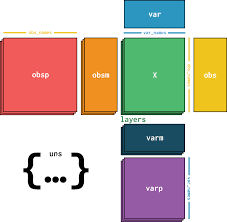

In [4]:
adata_name_lst = get_h5ads()
adata_name_lst

['fwd_filtered_GSM4432640_Alzheimer.h5ad',
 'fwd_filtered_GSM4432639_Alzheimer.h5ad',
 'fwd_filtered_GSM4432637_Control.h5ad',
 'fwd_filtered_GSM4432641_Alzheimer.h5ad',
 'fwd_filtered_GSM4432635_Control.h5ad',
 'fwd_filtered_GSM4432636_Control.h5ad',
 'fwd_filtered_GSM4432638_Alzheimer.h5ad']

In [5]:
H5ADS = [f"./data/4.H5AD_filtered_without_doublets/{i}" for i in adata_name_lst]

MERGED_NAME = "alzheimer_data_concat"
H5AD_CONCAT = f"./data/5.H5AD_concatenated/{MERGED_NAME}_v{VERSION}.h5ad"

In [6]:
H5ADS

['./data/4.H5AD_filtered_without_doublets/fwd_filtered_GSM4432640_Alzheimer.h5ad',
 './data/4.H5AD_filtered_without_doublets/fwd_filtered_GSM4432639_Alzheimer.h5ad',
 './data/4.H5AD_filtered_without_doublets/fwd_filtered_GSM4432637_Control.h5ad',
 './data/4.H5AD_filtered_without_doublets/fwd_filtered_GSM4432641_Alzheimer.h5ad',
 './data/4.H5AD_filtered_without_doublets/fwd_filtered_GSM4432635_Control.h5ad',
 './data/4.H5AD_filtered_without_doublets/fwd_filtered_GSM4432636_Control.h5ad',
 './data/4.H5AD_filtered_without_doublets/fwd_filtered_GSM4432638_Alzheimer.h5ad']

In [7]:
adatas = [sc.read_h5ad(i) for i in H5ADS]
adatas

[AnnData object with n_obs × n_vars = 373 × 23508
     obs: 'batch', 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts', 'doublet'
     var: 'gene_ids', 'n_cells',
 AnnData object with n_obs × n_vars = 1671 × 24272
     obs: 'batch', 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts', 'doublet'
     var: 'gene_ids', 'n_cells',
 AnnData object with n_obs × n_vars = 1304 × 21871
     obs: 'batch', 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts', 'doublet'
     var: 'gene_ids', 'n_cells',
 AnnData object with n_obs × n_vars = 3263 × 25974
     obs: 'batch', 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts', 'doublet'
     var: 'gene_ids', 'n_cells',
 AnnData object with n_obs × n_vars = 2599 × 26100
     obs: 'batch', 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts', 'doublet'
     var: 'gene_ids', 'n_cells',
 AnnData object with n_obs × n_vars = 926 × 21031
     obs: 'batch', 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts', 'doublet'
     var: 'gene_ids',

In [8]:
adata_merged = anndata.AnnData.concatenate(*adatas, batch_key='batch_num', join="inner")
adata_merged

AnnData object with n_obs × n_vars = 12626 × 19965
    obs: 'batch', 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts', 'doublet', 'batch_num'
    var: 'gene_ids', 'n_cells-0', 'n_cells-1', 'n_cells-2', 'n_cells-3', 'n_cells-4', 'n_cells-5', 'n_cells-6'

In [9]:
adata_merged.var = adata_merged.var[['gene_ids']]
adata_merged

AnnData object with n_obs × n_vars = 12626 × 19965
    obs: 'batch', 'condition', 'n_genes', 'prc_mt', 'prc_rb', 'n_counts', 'doublet', 'batch_num'
    var: 'gene_ids'

In [10]:
adata_merged.obs

,batch,condition,n_genes,prc_mt,prc_rb,n_counts,doublet,batch_num
AAAGATGGTATAAACG-1-0,GSM4432640,Alzheimer,1849,0.063633,0.222717,3143.0,singlet,0
AAAGCAAAGACTTTCG-1-0,GSM4432640,Alzheimer,2492,0.021692,0.260304,4610.0,singlet,0
AAAGCAACAGCGAACA-1-0,GSM4432640,Alzheimer,4826,0.252815,0.168544,13053.0,singlet,0
AACCATGGTCTCAACA-1-0,GSM4432640,Alzheimer,2311,0.143301,0.429902,4187.0,singlet,0
AACCGCGCAGAAGCAC-1-0,GSM4432640,Alzheimer,4583,0.134953,0.206398,12597.0,singlet,0
...,...,...,...,...,...,...,...,...
TTTGGTTTCGCCAGCA-1-6,GSM4432638,Alzheimer,1559,1.855848,0.129478,2317.0,singlet,6
TTTGGTTTCGGTTAAC-1-6,GSM4432638,Alzheimer,1958,3.612282,0.270921,3322.0,singlet,6
TTTGTCAAGATCCCAT-1-6,GSM4432638,Alzheimer,1677,1.465927,0.316957,2524.0,singlet,6
TTTGTCAAGCTAACTC-1-6,GSM4432638,Alzheimer,2417,1.857010,0.278552,4308.0,singlet,6


In [11]:
adata_merged.obs["batch"].value_counts()

GSM4432641    3263
GSM4432635    2599
GSM4432638    2490
GSM4432639    1671
GSM4432637    1304
GSM4432636     926
GSM4432640     373
Name: batch, dtype: int64

In [12]:
adata_merged.write_h5ad(
    H5AD_CONCAT,
    compression=hdf5plugin.FILTERS["zstd"],
    compression_opts=hdf5plugin.Zstd(clevel=5).filter_options
)